In [0]:
import pyspark

In [0]:
df = sqlContext.sql("SELECT * FROM image01_overlap_1_csv")
input_data = df.select("*").toPandas()

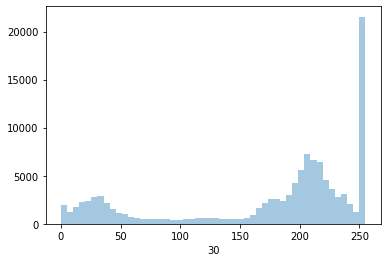

In [0]:
import seaborn as sns
display(sns.distplot(input_data['30'],kde=False))

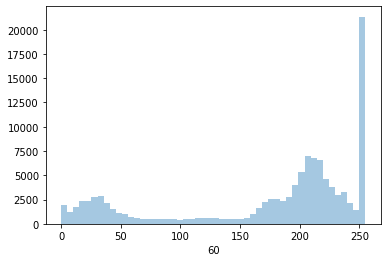

In [0]:
import seaborn as sns
display(sns.distplot(input_data['60'],kde=False))

In [0]:
input_data.isna().any()

Out[12]: 00 False
01 False
1 False
2 False
3 False
 ... 
60 False
61 False
62 False
63 False
64 False
Length: 66, dtype: bool

In [0]:
from sklearn.model_selection import train_test_split
 
train, test = train_test_split(input_data,test_size=0.2, random_state=123)
X_train = train.drop(["64"], axis=1)
X_test = test.drop(["64"], axis=1)
y_train = train['64']
y_test = test['64']


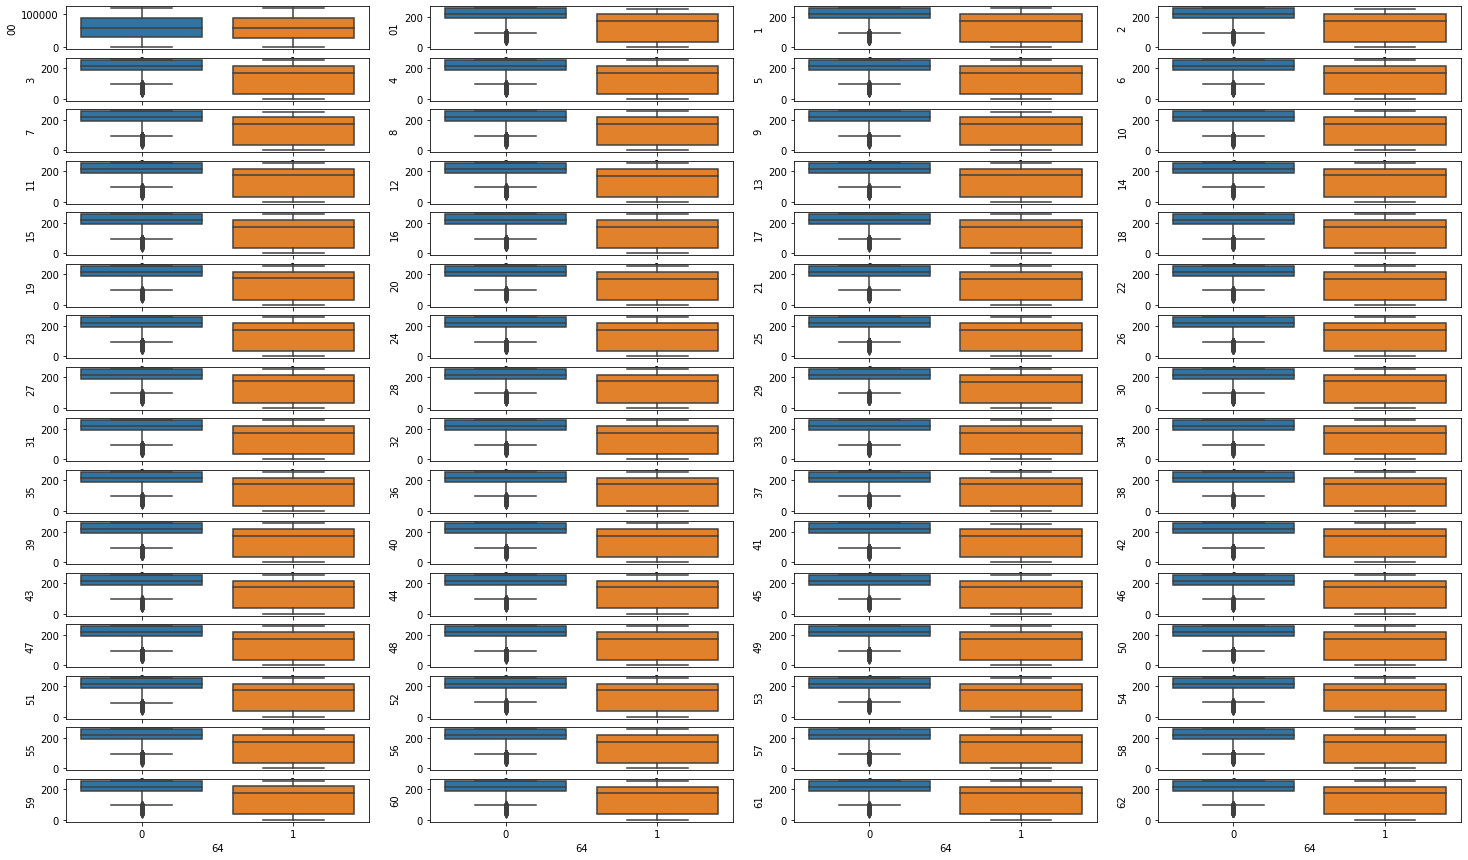

In [0]:
import matplotlib.pyplot as plt
dims = (16, 4)
f, axes = plt.subplots(dims[0], dims[1], figsize=(25, 15))
axis_i, axis_j = 0, 0
for col in input_data.columns:
  if col == '64':
    continue # Box plots cannot be used on indicator variables
  sns.boxplot(x = y_train, y=input_data[col], ax=axes[axis_i, axis_j])
  axis_j += 1
  if axis_j == dims[1]:
    axis_i += 1
    axis_j = 0

In [0]:
from sklearn.ensemble import RandomForestClassifier
randomFClassifier = RandomForestClassifier(random_state=0,n_estimators=100,oob_score=True, n_jobs=1)
randomFClassifier = randomFClassifier.fit(X_train, y_train)

In [0]:
y_pred = randomFClassifier.predict(X_test)

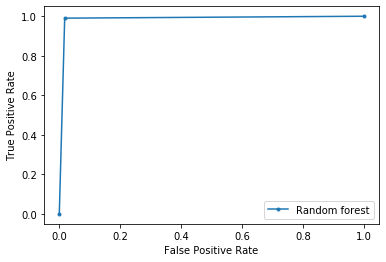

In [0]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
auc_score = roc_auc_score(y_test, y_pred)
fpr, tpr, threshold = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, marker='.', label='Random forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

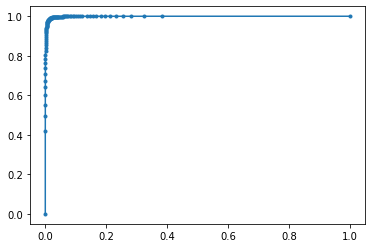

In [0]:

predict_probabilities = randomFClassifier.predict_proba(X_test)
fprp, tprp, thresholdp = roc_curve(y_test, predict_probabilities[:,1])
plt.plot(fprp, tprp, marker='.', label='Random forest probabilty')


In [0]:
importance = randomFClassifier.feature_importances_
indices = importance.argsort()[::-1]
print(importance)

[0.00165674 0.02110989 0.02205414 0.01813019 0.03183297 0.03931186
 0.02974507 0.02937201 0.02810688 0.01772586 0.01162168 0.01745444
 0.01470815 0.02894896 0.01196454 0.01151495 0.0171658 0.00678704
 0.01024579 0.00392991 0.02014291 0.01375363 0.00866326 0.01003107
 0.00986661 0.01176887 0.00678041 0.0074627 0.01265996 0.01468141
 0.01434456 0.00997816 0.01343233 0.01569837 0.00852873 0.01030389
 0.01399109 0.01434668 0.0173157 0.01011089 0.00646756 0.01888107
 0.01102685 0.01456216 0.01645246 0.01250567 0.01072968 0.00682228
 0.00752485 0.01540245 0.0175952 0.01785967 0.01911329 0.00933537
 0.01237199 0.01097823 0.01554431 0.03167737 0.02178978 0.01904934
 0.01952188 0.01836709 0.01687073 0.01543803 0.0168646 ]

In [0]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred)
print(auc_score)

0.9863029953886217

In [0]:

from sklearn.metrics import accuracy_score
print('sklearn.metrics Accuracy',accuracy_score(y_test, y_pred))

sklearn.metrics Accuracy 0.9864754274884783

In [0]:
from sklearn.metrics import confusion_matrix
CC_test = confusion_matrix(y_test, y_pred)
print(CC_test)

[[10915 197]
 [ 117 11988]]